<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.1
Reconsider the pig problem of Example 1.1, but now suppose that the price for  pigs after $t$ days is $p=0.65e^{−\frac{0.01}{0.65}t}$ dollars/pound.

Descrição do Exemplo 1.1:

> A pig weighing 200 pounds gains 5 pounds per day and costs 45 cents a day to keep. The market price for pigs is 65 cents per pound, but is falling 1 cent per day. When should the pig be sold?


 
### a) Show that the price for pigs is falling by one cent/day at time $t=0$. What happens as $t$ increases?
 
Expresse a relação preço $p$ x tempo $t$ conforme abaixo
$$p = 0.65e^{-\frac{0.01}{0.65}t} \text{ dólares por libra}$$
 
Faça $t = 0$ e $p = p_0$
    
$$p_0 = 0.65e^{0} = 0.65 \text{ dólares por libra} $$
    
Faça $t = 1$ e $p = p_1$
    
$$p_1 =0.65e^{-\frac{0.01}{0.65}} \approx 0.64 \text{ dólares por libra} $$
    
Expresse $\Delta_p$ como variação de preço por dia no tempo $t = 0$ conforme abaixo
    
$$\Delta_p = p_1 - p_0 $$
    
    
Faça $p_0 = 0.65$ e $p_1 = 0.64$
    
$$\Delta_p = p_1 - p_0 = 0.64 - 0.65 = - 0.01 \text{ dólares por libra} = - 1 \text{ centavo por libra}$$  
    
Portanto, foi mostrado que o preço dos suínos está decaindo 1 centavo ao dia no tempo $t = 0$.
 
Pelo gráfico abaixo, o comportamento da função preço $p$ está decaindo a medida que o tempo $t$ aumenta, e segue uma função exponencial conforme o tempo avança.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


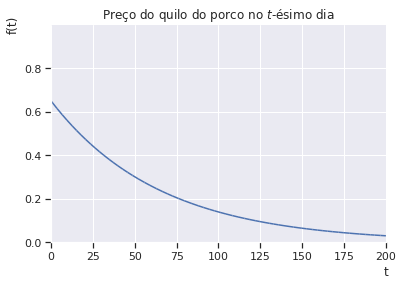

In [ ]:
t = var('t', real=True)

p = 0.65*E**(-(0.01/0.65)*t)

plot(p, (t, 0, 200), ylim=[0, 1], title='Preço do quilo do porco no $t$-ésimo dia')

### b) Find the optimal time to sell the pig. Use the five-step method, and model as a one–variable optimization problem.





#### Passo 1 - Variáveis

* $t$ = tempo (dias)
* $w$ = peso do porco (lbs)
* $p$ = preço do porco (\\$/lb)
* $C$ = custo de manutenção do porco em $t$ dias (\\$)
* $R$ = receita obtida com a venda do porco (\\$)
* $P$ = lucro com a venda do porco (\\$)


#### Passo 1 - Suposições do problema

In [ ]:
t = var('t', real=True)

w = 200 + 5*t
p = 0.65*E**(-(0.01/0.65)*t)
C = 0.45*t
R = p*w
P = R-C

#t >= 0

#### Passo 2 - Abordagem de modelagem

Problema de otimização unidimensional cujo objetivo é maximizar $P$ lucro do proprietário do porco.


#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{max} ~~& f(t) \\
\text{sujeito a} ~~& t \in \Omega \\
\end{align}
$$

Sendo:
* $f(t)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Desta forma, temos:

$$
\begin{align}
\text{max} ~~& f(t) = 0.65 \left(5 t + 200\right) e^{−\frac{0.01}{0.65}t} - 0.45 t\\
\text{sujeito a} ~~& t \geq 0 \\
\end{align}
$$

#### Passo 4 - Resolução do modelo

Função a ser otimizada:

In [ ]:
f = P
Math(f"f(t)={latex(f)}")

<IPython.core.display.Math object>

Calculando $\frac{df(t)}{dt}$,

In [ ]:
dfdt = diff(f, t)
Math("\\frac{df(t)}{dt}=" + latex(dfdt))

<IPython.core.display.Math object>

Calculando $\frac{df(t)}{dt} = 0$,


In [ ]:
#s_b = solve(dfdt, [t], dict=True, rational=True)[0]
s_b = solve(dfdt, [t], dict=True)[0]
 
Math(f"""
\\begin{{aligned}}
0 &= \\frac{{df(t)}}{{dt}} \\\\
0 &= {latex(dfdt)}  \\\\
t&={latex(s_b[t])}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Calculando $\frac{d^2f(t)}{dt^2}$,

In [ ]:
df2dt2 = diff(dfdt, t)
df2dt2 = simplify(df2dt2)
Math(f"\\frac{{d^2f(t)}}{{dt^2}} = {latex(df2dt2)}")

<IPython.core.display.Math object>

No ponto informado na primeira derivada é um ponto de máximo, pois temos 

In [ ]:
Math(f"\\frac{{d^2f(t={s_b[t]})}}{{dt^2}} = {df2dt2.subs(s_b)}.")

<IPython.core.display.Math object>

#### Passo 5 - Resposta da pergunta

A resposta obtida pelo modelo matemático proposto é vender o porco depois de $13,86$ dias, obtendo um lucro de aproximadamente:

In [ ]:
Math(f"\${latex(f.subs(s_b))}.")

<IPython.core.display.Math object>

### c) The parameter $0.01$ represents the rate at which price is falling at time $t=0$. Perform a sensitivity analysis on this parameter. Consider both the best time to sell and the resulting net profit.

Suponhamos que a depreciação da carne não seja mais o valor fixo de $\$0.01$, mas dependa de uma variável $r$ agora:
$$p = 0.65e^{−\frac{r}{0.65}t}$$

Assim, temos a função $f(t;r)$ sendo como:

In [ ]:
r = var('r', real=True)

p = 0.65*E**(-(r/0.65)*t)
R = p*w
P = R-C

f = P
Math(f"f(t; r)={latex(f)}.")

<IPython.core.display.Math object>

Calculando $\frac{df(t;r)}{dt}$,

In [ ]:
dfdt = diff(f, t)
Math("\\frac{df(t;r)}{dt}=" + latex(dfdt))

<IPython.core.display.Math object>

Calculando $\frac{df(t;r)}{dt}$ = 0,

In [ ]:
s_c = solve(dfdt, [t], dict=True, rational=True)[0]
 
Math(f"""
\\begin{{aligned}}
0 &= \\frac{{df(t;r)}}{{dt}} \\\\
0 &= {latex(dfdt)}  \\\\
t&={latex(s_c[t])}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

É mais natural e mais útil interpretar dados de sensibilidade em termos de mudança relativa ou mudança percentual (em $t$ é $100\cdot\frac{\Delta}{t}$) do que em termos absolutos.

* A mudança relativa em $t$ é $\frac{\Delta t}{t}$;
* A mudança absoluta em $t$ é $100\cdot\frac{\Delta t}{t}$.

Se $r$ varia em $\Delta r$, resultando numa variação $\Delta t$ em $t$, então a razão entre as variações relativas é $\frac{\Delta t}{t}$ dividido por $\frac{\Delta r}{r}$. Assim, analisando quando $\Delta r \rightarrow 0$ e usando a definição de derivada, temos
$$\frac{\Delta t/t}{\Delta r/r} \rightarrow \frac{dt}{dr} \cdot \frac{r}{t}.$$

Calculando $\frac{dt}{dr}$,


In [ ]:
dtdr = diff(s_c[t])

Math(f"""
\\begin{{aligned}}
t    &= {latex(s_c[t])}; \\\\
\\frac{{dt}}{{dr}} &= {latex(dtdr)} \\\\
     &= {latex(simplify(dtdr))}.
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Agora, podemos calcular a variação para $r=0.01$ (valor assumido no enunciado) e para $t=13.86...$ (ponto de máximo):


In [ ]:
valores = {
    r: 0.01,
    t: s_b[t]
}

Math(f"""
\\begin{{aligned}}
\\frac{{dt}}{{dr}} \\cdot \\frac{{r}}{{t}} &= {latex(dtdr*r/t)} \\\\
&= {latex((dtdr*r/t).subs(valores))}.
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Podemos então concluir que para cada $1\%$ que se aumenta em $r$, diminui-se aproximadamente $3.46\%$ em $t$.
 
Queremos também saber a taxa de variação para a função objetivo, isto é, para o lucro:
\begin{align*}
\frac{\Delta f(r)/r}{\Delta r/r} \rightarrow \frac{df(r)}{dr} \cdot \frac{r}{f(r)},
\end{align*}
sendo

In [ ]:
f_r = f.subs(s_c)

Math(f"""
\\begin{{aligned}}
t &= {latex(s_c[t])}; \\\\
f(r) &= f(t; r); \\\\
     &= {latex(f_r)}.
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Derivando a função lucro $f(r)$, teremos $\frac{{df(r)}}{{dr}}=$

In [ ]:
dfdr = diff(f_r, r)

Math(latex(dfdr))

<IPython.core.display.Math object>

Agora, podemos obter a variação para $r=0.01$ e $ f(r) = f(0.01) = 135.194... $ para a função lucro:

In [ ]:
valores = {
    r: 0.01
}

Math(f"\\frac{{df(r)}}{{dr}} \\cdot \\frac{{r}}{{f(r)}} = {latex((dfdr*r/f_r).subs(valores))}.")

<IPython.core.display.Math object>

Podemos então concluir que para cada $1\%$ que se aumenta em $r$, ocorrerá uma redução de aproximadamente $0.223\%$ de lucro, caso o porco seja vendido na data que maximize o lucro.

### d) Compare the results of (b) to what was done in Section 1.1, and comment on the robustness of our model.

Na seção 1.1, a relação preço x tempo é linear. Além disso, o melhor momento para vender o porco é em 8 dias, com lucro líquido igual a 133.20 dólares. Já nesta questão, o melhor momento para vender o porco aumentou para 13.86 dias, com lucro líquido igual a 135.19 dólares com o uso da função exponencial para a relação preço x tempo. Portanto, o nosso modelo não é robusto com relação à suposição de linearidade.